<a href="https://colab.research.google.com/github/sammfyu/hft-modelling/blob/master/XGBoost_Tutorial_Reg_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresson Exercise





In [0]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib
train_rows = 100
test_rows = 20
data = pd.DataFrame(np.random.rand(train_rows,5), columns=['a', 'b', 'c','d','e'])
label = pd.DataFrame(np.random.randint(10, size=train_rows))
test_data = pd.DataFrame(np.random.rand(test_rows,5),columns=['a', 'b', 'c','d','e'])
test_label = pd.DataFrame(np.random.randint(10, size=test_rows))

In [122]:
#Let's try with Scikit API
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score

model = XGBRegressor(objective ='reg:squarederror')
eval_set = [(data, label), (test_data, test_label)]
model.fit(data, label, eval_metric ='rmse',eval_set = eval_set,verbose = False  )


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [123]:
ypred = model.predict(data)
mse = mean_squared_error(label,ypred)
print("MSE: %.6f" % mse)
print("RMSE: %.6f" % np.sqrt(mse)) 

MSE: 0.636207
RMSE: 0.797626


In [124]:
ypred1 = model.predict(test_data)
mse = mean_squared_error(test_label,ypred1)
print("MSE: %.6f" % mse)
print("RMSE: %.6f" % np.sqrt(mse)) 

MSE: 14.170962
RMSE: 3.764434


In [125]:
#To merge 2 column into pandas dataframe
table = pd.DataFrame(pd.np.column_stack([label,ypred]))
table

#Other way : 
#df2 = pd.DataFrame(ypred)
#pd.concat([label,df2],axis = 1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,0,1
0,3.0,3.275341
1,9.0,6.749049
2,6.0,5.862212
3,3.0,3.595626
4,4.0,3.543866
...,...,...
95,7.0,6.884387
96,8.0,7.000330
97,3.0,3.494333
98,7.0,6.253826


In [126]:
table2 = pd.DataFrame(pd.np.column_stack([test_label,ypred1]))
table2

#accuracy = accuracy_score(test_label, ypred1)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


,0,1
0,1.0,5.627826
1,0.0,1.595547
2,2.0,7.726559
3,5.0,5.063390
4,4.0,6.005237
5,9.0,3.420991
6,2.0,5.635531
7,1.0,4.282403
8,6.0,4.884737
9,9.0,4.098725


In [0]:
#NOw we should check for feature importnace
result = model.evals_result()
epochs = len(result['validation_0']['rmse'])
x_axis = range(0,epochs)


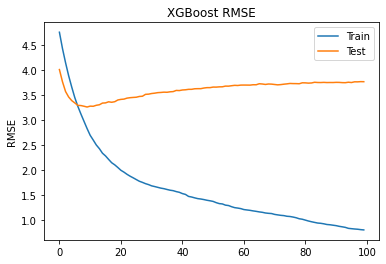

In [128]:
#plot
from matplotlib import pyplot
fig, ax = pyplot.subplots()
ax.plot(x_axis, result['validation_0']['rmse'], label = 'Train')
ax.plot(x_axis , result['validation_1']['rmse'],label = 'Test')
ax.legend()
pyplot.ylabel('RMSE');pyplot.title("XGBoost RMSE")
pyplot.show()

So as we can see , the number of error increases after a certain amount of learning.

XGBoost supports early stopping after a fixed number of iteratiions. In addition to specifying a metric and test dataset for evaluation each epoch, you must specify a window number that no imporovemen is observed. THis is called **early_stopping_rounds**.

### Now we can train the model again from the same data.

In [130]:
model.fit(data, label,early_stopping_rounds=10, eval_metric ='rmse',eval_set = eval_set,verbose = False  )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [131]:
ypred = model.predict(data)
mse = mean_squared_error(label,ypred)
print("Train MSE: %.6f" % mse)
print(" Test RMSE: %.6f" % np.sqrt(mse)) 

ypred1 = model.predict(test_data)
mse1 = mean_squared_error(test_label,ypred1)
print("Test MSE: %.6f" % mse1)
print("Test RMSE: %.6f" % np.sqrt(mse1)) 

Train MSE: 7.987217
 Test RMSE: 2.826166
Test MSE: 10.612442
Test RMSE: 3.257674
